In [ ]:
!pip install statsmodels==0.12.2
!pip install pmdarima

In [ ]:
# 1. 기본
# 데이터를 다루기 위한 pandas와 numpy를 import 해주었습니다.
import pandas as pd
import numpy as np


# 2. 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

# 3. 유틸
# tqdm 패키지는 반복문에 대해 얼마나 진척되었는지를 가시적으로 확인할 수 있도록 도와줍니다.
# https://github.com/tqdm/tqdm 사용법은 정말 간단합니다.
from tqdm.auto import tqdm


# 4. 설정
# 경고가 나와서, 출력이 많아지지 않기 위해 ignore를 설정해주었습니다.
import warnings
warnings.filterwarnings('ignore')


# 5. stats models
# 시계열 모델을 위한 ARIMA를 임포트 해주었습니다.
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima


# 6. 구글 드라이브
# colab이 구글 드라이와 연결되어 있기 때문에 임포트해주었습니다.
from google.colab import drive

In [ ]:
# 1) 구글 드라이브 경로, 2) 데이터 경로, 3) 전체 경로를 상수로 정해주고 사용했습니다.
GOOGLE_DRIVE_PATH = "/content/drive"
DATA_PATH = "/content/drive/MyDrive/dacon/data"
SUBMIT_PATH = "/content/drive/dacon/MyDrive/submit"

In [ ]:
 drive.mount(GOOGLE_DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_x = pd.read_csv(DATA_PATH  + "/train_x_df.csv")
train_y = pd.read_csv(DATA_PATH  + "/train_y_df.csv")
test_x = pd.read_csv(DATA_PATH  + "/test_x_df.csv")

In [ ]:
def make_mfi(my_df, period = 14):

  result = []

  for sample_id in my_df['sample_id'].unique().tolist():
    df = my_df[my_df['sample_id'] == sample_id]
    
    df['typical_price'] = (df['close'] + df['high'] + df['low']) / 3
    df['money_flow'] = df['typical_price'] * df['volume']
    df['price_diff'] = df.groupby(['sample_id'])['typical_price'].diff(1).shift(-1)
    df['pf'] = np.where(df['price_diff'] > 0, df['money_flow'], 0)
    df['nf'] = np.where(df['price_diff'] < 0, df['money_flow'], 0)

    # 상승분의 14일 평균을 구해줍니다.
    # 하락분의 14일 평균을 구해줍니다.
    df["pmf"] = df["pf"].rolling(window=period, min_periods=period).sum()
    df["nmf"] = df["nf"].rolling(window=period, min_periods=period).sum()

    MFI = df['pmf'] / (df['pmf'] + df['nmf'])
    df['mfi'] = MFI
    df['mfi'] = df['mfi']

    result.append(df)
    
  output = pd.concat(result, axis=0)

  return output

In [ ]:
test_x = make_mfi(test_x, 14)

In [ ]:
def get_open(df, sample_id):
  return df[df["sample_id"] == sample_id]["open"].values

In [ ]:
def get_mfi(df, sample_id):
  return df[df["sample_id"] == sample_id]["mfi"].values

In [ ]:
test_x.head(20)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,typical_price,money_flow,price_diff,pf,nf,pmf,nmf,mfi
0,7929,0,1,0.941549,0.941773,0.940431,0.941176,0.169500,85.595390,0.089465,0.108427,54.745537,0.941127,0.159521,-0.000155,0.000000,0.159521,NaN,NaN,NaN
1,7929,1,1,0.941586,0.941736,0.940282,0.940897,0.237560,119.955322,0.119287,0.105256,53.145061,0.940971,0.223538,-0.000485,0.000000,0.223538,NaN,NaN,NaN
2,7929,2,1,0.941270,0.941586,0.938940,0.940934,0.231588,116.848953,0.149109,0.163196,82.363953,0.940487,0.217805,-0.000242,0.000000,0.217805,NaN,NaN,NaN
3,7929,3,1,0.940971,0.941363,0.939052,0.940319,0.238199,120.162766,0.201297,0.157981,79.687485,0.940244,0.223965,-0.000168,0.000000,0.223965,NaN,NaN,NaN
4,7929,4,1,0.940077,0.940561,0.939760,0.939909,0.082302,41.511501,0.055916,0.009733,4.908966,0.940077,0.077370,0.000801,0.077370,0.000000,NaN,NaN,NaN
5,7929,5,1,0.940189,0.941773,0.939480,0.941381,0.819940,413.706848,0.341087,0.182472,92.091576,0.940878,0.771464,0.000988,0.771464,0.000000,NaN,NaN,NaN
6,7929,6,1,0.941400,0.942313,0.941214,0.942071,0.137926,69.708817,0.134198,0.045534,23.013325,0.941866,0.129908,0.000043,0.129908,0.000000,NaN,NaN,NaN
7,7929,7,1,0.941885,0.942500,0.941400,0.941829,0.317801,160.594757,0.150973,0.261878,132.330566,0.941910,0.299340,0.000124,0.299340,0.000000,NaN,NaN,NaN
8,7929,8,1,0.941810,0.942425,0.941549,0.942127,0.301515,152.375366,0.139790,0.102415,51.761826,0.942034,0.284037,-0.001485,0.000000,0.284037,NaN,NaN,NaN
9,7929,9,1,0.941885,0.942239,0.939704,0.939704,0.143216,72.296043,0.132334,0.067231,33.943432,0.940549,0.134702,-0.000019,0.000000,0.134702,NaN,NaN,NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train_x = pd.read_csv(DATA_PATH  + "/train_x_df.csv")
train_y = pd.read_csv(DATA_PATH  + "/train_y_df.csv")

x = train_x[train_x["sample_id"] == 0]
y = train_y[train_y["sample_id"] == 0]

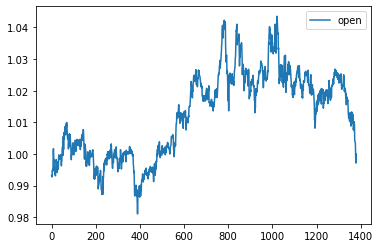

In [ ]:
sample_x = x[['open']]
sample_y = y[['open']]
fig = sample_x.plot()

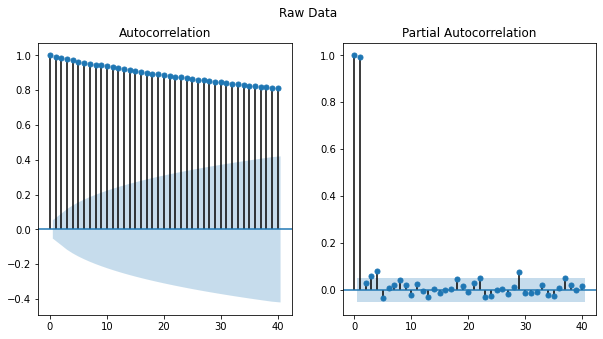

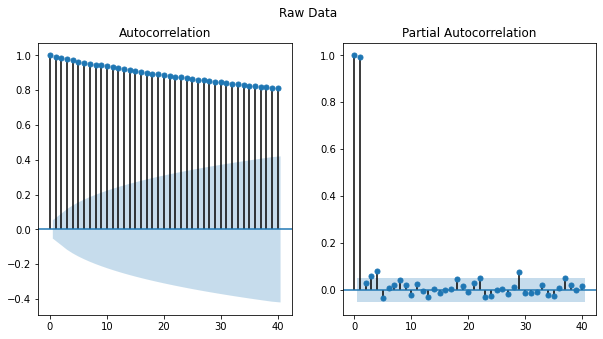

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(sample_x.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(sample_x.values.squeeze(), lags=40, ax=ax[1])

In [ ]:
diff_sample_x = sample_x.copy()
diff_sample_x = diff_sample_x['open'].diff()
diff_sample_x = diff_sample_x.dropna()

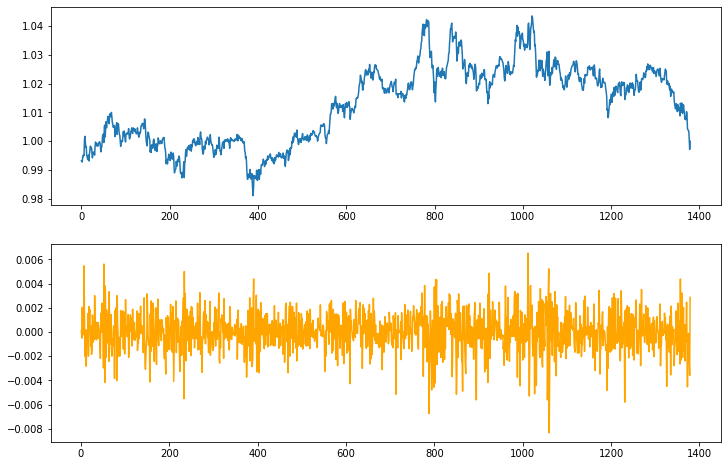

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(sample_x['open'])
plt.subplot(212)
plt.plot(diff_sample_x, 'orange')
plt.show()

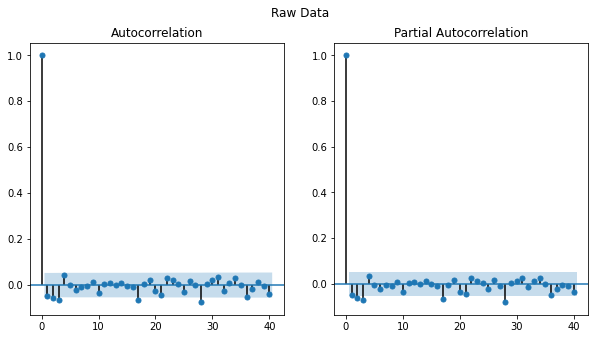

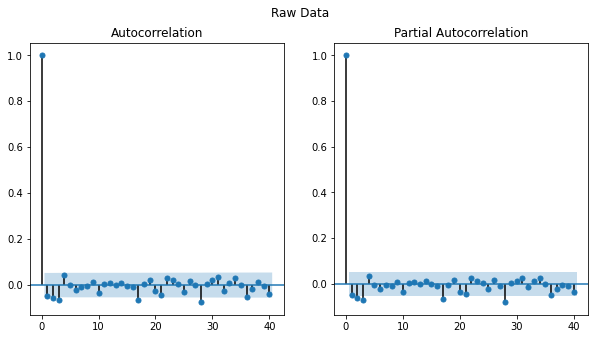

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_sample_x.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_sample_x.values.squeeze(), lags=40, ax=ax[1])

In [ ]:
auto_arima_model = auto_arima(sample_x, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, 
                              d=1,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13775.142, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13776.692, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13779.862, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13783.288, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13776.254, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13771.119, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13778.654, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13783.079, Time=1.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13779.145, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13769.119, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13776.767, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13781.907, Time=1.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13784.079, Time=1.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13781.863, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13782

In [ ]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1380
Model:               SARIMAX(3, 1, 0)   Log Likelihood                6897.040
Date:                Wed, 16 Jun 2021   AIC                         -13784.079
Time:                        13:02:12   BIC                         -13757.934
Sample:                             0   HQIC                        -13774.298
                               - 1380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.444e-06   4.49e-05      0.099      0.921   -8.35e-05    9.24e-05
ar.L1         -0.0540      0.022     -2.494      0.013      -0.096      -0.012
ar.L2         -0.0633      0.023     -2.727      0.006      -0.109      -0.018
ar.L3         -0.0711      0.023     -3.142      0.002      -0.116      -0.027
sigma2      2.649e-06   7.91e-08     33.506      0.000    2.49e-06     2.8e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               128.94
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = auto_arima_model.predict(len(sample_y), return_conf_int=True)
predicted_value = prediction[0]
predicted_up = prediction[1][:,0]
predicted_lb = prediction[1][:,1]

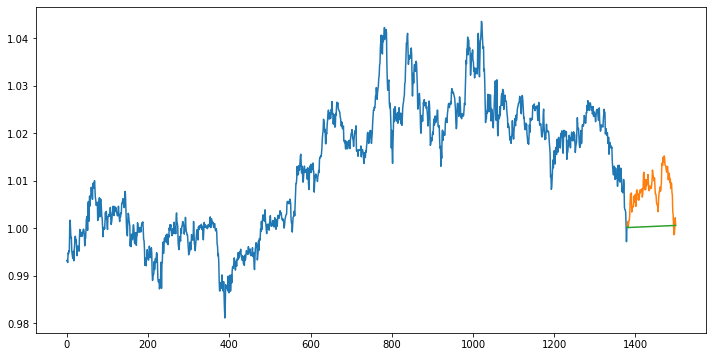

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(sample_x)
plt.plot(np.arange(1380, 1500), sample_y)
plt.plot(np.arange(1380, 1500), predicted_value)